In [70]:
from cdlib.algorithms import louvain, surprise_communities, leiden, walktrap
from matplotlib.colors import ListedColormap
from itertools import combinations

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

RANDOM_SEED = 671
NUM_CAST = 16

In [71]:
all_data = pd.read_csv("movies.csv")
all_data.head()
people = all_data[["director_name", "writer_name", "cast_name"]]
people.head()
movie_casts = people["cast_name"]
cast_graph = nx.Graph()
i = 0
for movie in movie_casts:
    i += 1
    if i <= 1000:
        casts = movie.split(",")
        casts = casts[:NUM_CAST]
        casts = combinations(casts, 2)
        for cast_pair in casts:
            cast_graph.add_edge(*cast_pair)
connected_components = list(nx.connected_components(cast_graph))
largest_component = max(connected_components, key=len)
cast_graph = cast_graph.subgraph(largest_component)

In [72]:
print(cast_graph.number_of_nodes())
print(cast_graph.number_of_edges())
print(len(list(nx.connected_components(cast_graph))))

2684
23301
1


In [73]:
genre_dict = dict()
for i in range(len(all_data)):
    movie = all_data.iloc[i,:]
    genre_list = movie.genre.split(",")
    for genre in genre_list:
        if genre in genre_dict:
            genre_dict[genre] += 1
        else:
            genre_dict[genre] = 1
genre_dict

{'Drama': 177,
 'Crime': 51,
 'Action': 50,
 'Biography': 29,
 'History': 10,
 'Adventure': 60,
 'Western': 7,
 'Romance': 23,
 'Sci-Fi': 20,
 'Fantasy': 14,
 'Mystery': 31,
 'Family': 13,
 'Thriller': 31,
 'War': 23,
 'Comedy': 45,
 'Animation': 23,
 'Music': 4,
 'Horror': 5,
 'Film-Noir': 4,
 'Musical': 1,
 'Sport': 5}

In [74]:
def create_color_list():
    k = 20
    cmap = plt.get_cmap('tab20', k)
    cmap1 = [cmap(i) for i in range(k)]
    return {'Crime': cmap1[0],
    'Action': cmap1[1],
    'Biography': cmap1[2],
    'History': cmap1[3],
    'Adventure': cmap1[4],
    'Western': cmap1[5],
    'Romance': cmap1[6],
    'Sci-Fi': cmap1[7],
    'Fantasy': cmap1[8],
    'Mystery': cmap1[9],
    'Family': cmap1[10],
    'Thriller': cmap1[11],
    'War': cmap1[12],
    'Comedy': cmap1[13],
    'Animation': cmap1[14],
    'Music': cmap1[15],
    'Horror': cmap1[16],
    'Film-Noir': cmap1[17],
    'Drama': cmap1[18],
    'Others': cmap1[19]}

cmap1 = create_color_list()

def get_color(labels, cmap=cmap1):
    res = list()
    for i in labels:
        res.append(cmap[i])
    return res

In [75]:
genre_set = set()
cast_genre_dict = dict()
for i in range(len(all_data)):
    movie = all_data.iloc[i,:]
    genre_list = movie.genre.split(",")
    cast_list = movie.cast_name.split(",")
    cast_list = cast_list[:NUM_CAST]
    for cast in cast_list:
        for genre in genre_list:
            if genre not in ["Drama", "Western", "Music", "Horror", "Musical", "Sport", "Film-Noir"]: # ["Music", "Musical", "History", "Fantasy", "Romance", "Western", "Family", "Sport", "Film-Noir"]:
                genre_set.add(genre)
                if cast in cast_genre_dict:
                    cast_genre_dict[cast].append(genre)
                else:
                    cast_genre_dict[cast] = [genre]
            elif cast not in cast_genre_dict:
                cast_genre_dict[cast] = ["Other"]

In [76]:
diff = 1
for cast, genre_list in cast_genre_dict.items():
    temp = dict()
    for genre in genre_list:
        if genre in temp:
            temp[genre] += 1
        else:
            temp[genre] = 1
    max_value = max(temp.values())
    result = []
    if max_value > diff:
        for k, v in temp.items():
            if v > diff:
                result.append(k)
    else:
        for k, v in temp.items():
            result.append(k)
    cast_genre_dict[cast] = result

In [77]:
coms = louvain(cast_graph, resolution=1, randomize=False)
print(len(coms.communities))

35


35


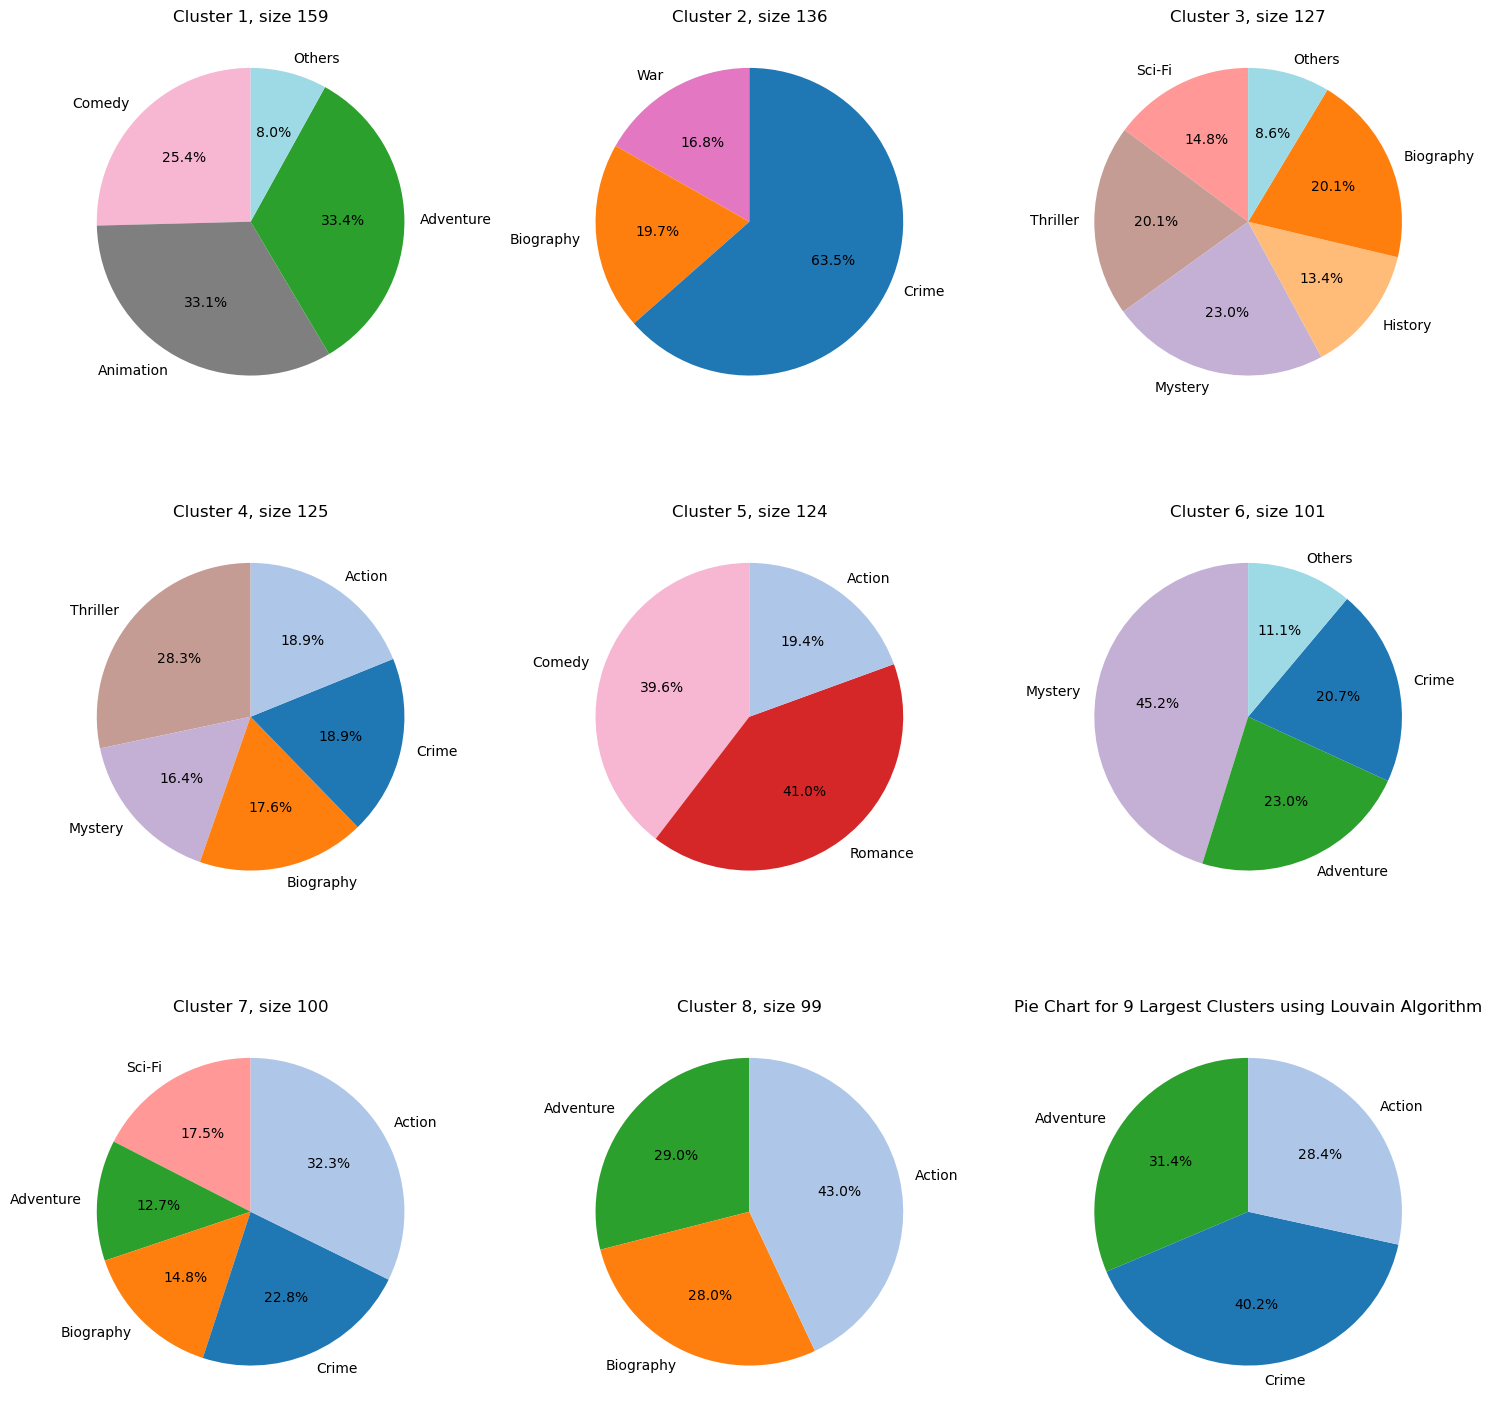

In [80]:
coms = louvain(cast_graph, resolution=1, randomize=False)
# coms = leiden(cast_graph)
print(len(coms.communities))
idx = 1
fig, axes = plt.subplots(3, 3, figsize=(15, 15), subplot_kw=dict(aspect="equal"))
axes = axes.flatten()
for com in coms.communities[:9]:
    labels = []
    sizes = []
    other = 0
    for genre in genre_set:
        labels.append(genre)
        num = 0
        for cast in com:
            if genre in cast_genre_dict[cast]:
                num += 1
        sizes.append(num)
    total = sum(sizes)
    plot_label = []
    plot_size= []
    for i in range(len(labels)):
        other = 0
        if sizes[i] < 0.1 * total:
            other += sizes[i]
        else:
            plot_label.append(labels[i])
            plot_size.append(sizes[i])
    if other > 0:
        plot_label.append("Others")
        plot_size.append(other)
    pie_colors = get_color(plot_label, create_color_list())
    ax = axes[idx-1]
    ax.pie(plot_size, labels=plot_label, autopct='%1.1f%%', startangle=90, colors=pie_colors)
    ax.set_title(f'Cluster {idx}, size {len(com)}')
    # ax.pie(data[i], labels=[f"Label {j}" for j in range(1, 6)], autopct="%1.1f%%", startangle=90)
    # ax.set_title(f"Chart {i+1}")
    idx += 1
plt.tight_layout()
# plt.title("Pie Chart for 9 Largest Clusters using Louvain Algorithm")
plt.show()

36


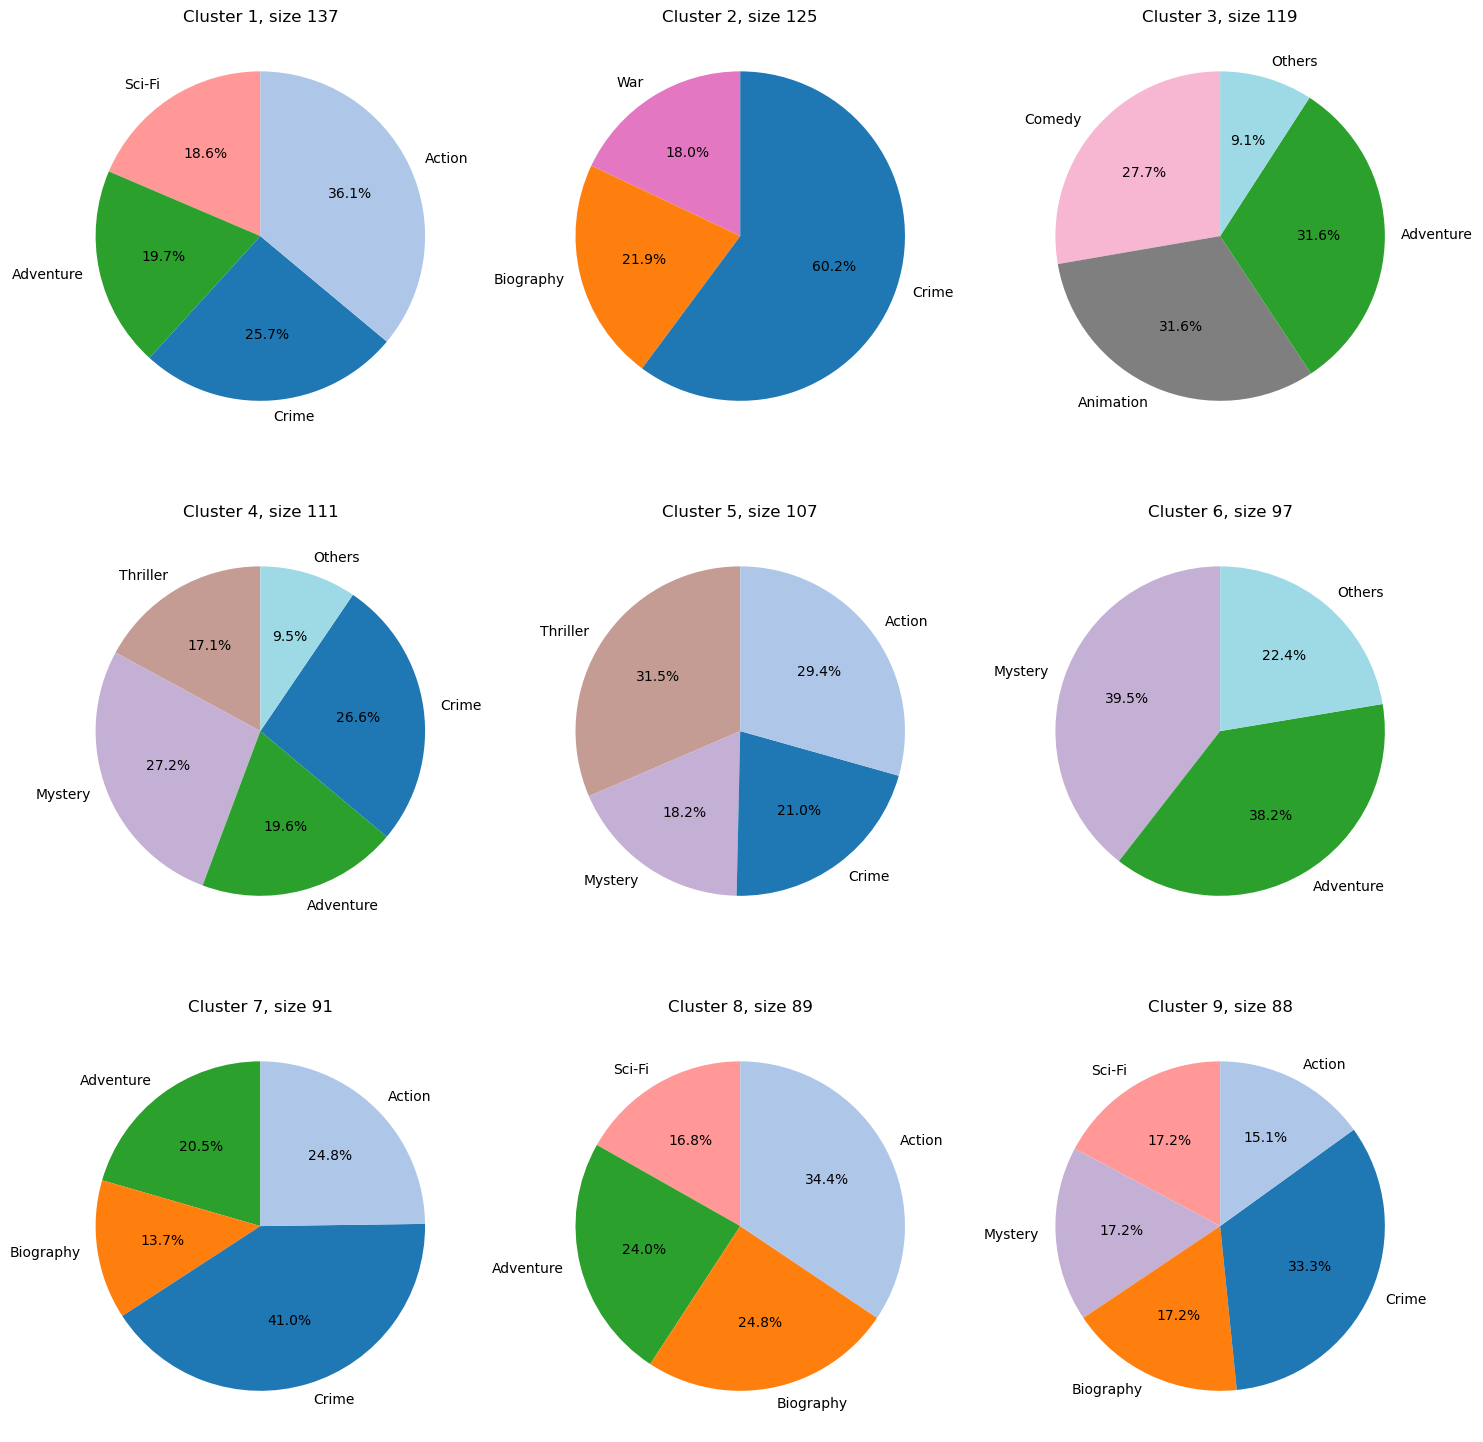

In [79]:
# coms = louvain(cast_graph, resolution=1, randomize=False)
coms = leiden(cast_graph)
print(len(coms.communities))
idx = 1
fig, axes = plt.subplots(3, 3, figsize=(15, 15), subplot_kw=dict(aspect="equal"))
axes = axes.flatten()
for com in coms.communities[:9]:
    labels = []
    sizes = []
    other = 0
    for genre in genre_set:
        labels.append(genre)
        num = 0
        for cast in com:
            if genre in cast_genre_dict[cast]:
                num += 1
        sizes.append(num)
    total = sum(sizes)
    plot_label = []
    plot_size= []
    for i in range(len(labels)):
        other = 0
        if sizes[i] < 0.1 * total:
            other += sizes[i]
        else:
            plot_label.append(labels[i])
            plot_size.append(sizes[i])
    if other > 0:
        plot_label.append("Others")
        plot_size.append(other)
    pie_colors = get_color(plot_label, create_color_list())
    ax = axes[idx-1]
    ax.pie(plot_size, labels=plot_label, autopct='%1.1f%%', startangle=90, colors=pie_colors)
    ax.set_title(f'Cluster {idx}, size {len(com)}')
    # ax.pie(data[i], labels=[f"Label {j}" for j in range(1, 6)], autopct="%1.1f%%", startangle=90)
    # ax.set_title(f"Chart {i+1}")
    idx += 1
plt.tight_layout()
plt.show()